In [95]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Convolution 1

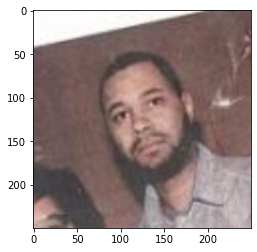

In [804]:
#load image
path = './lfw/Aaron_Patterson/Aaron_Patterson_0001.jpg'
image = cv2.imread(path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [805]:
def convertToGrayscale(img):
    grayImg = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    Y, Cr, Cb = cv2.split(grayImg)
    return Y

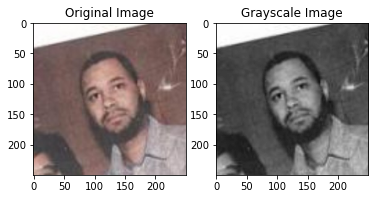

In [806]:
#show images
grayScaleImg=convertToGrayscale(image)
plt.subplot(121)
plt.title("Original Image")
plt.imshow(image)
plt.subplot(122)
plt.title("Grayscale Image")
plt.imshow(grayScaleImg,cmap='gray')
plt.show()

# Convolution 2

In [815]:
def computeDerivativeOfGaussianGradient(x, y, sigma):
    horizontal = cv2.getGaussianKernel(x, sigma)
#     horizontal = np.diff(horizontal)
    vertical = cv2.getGaussianKernel(y, sigma)
#     vertical = np.diff(vertical)
    GaussianKernel = horizontal.dot(vertical.T)
    DrGaussianKernel=np.gradient(GaussianKernel)
    return DrGaussianKernel

Horizontal Derivatives: [[ 0.01033719  0.04632809  0.0763821   0.04632809  0.01033719]
 [ 0.00948461  0.04250706  0.0700823   0.04250706  0.00948461]
 [ 0.          0.          0.          0.          0.        ]
 [-0.00948461 -0.04250706 -0.0700823  -0.04250706 -0.00948461]
 [-0.01033719 -0.04632809 -0.0763821  -0.04632809 -0.01033719]]
Vertical Derivatives: [[ 0.01033719  0.00948461  0.         -0.00948461 -0.01033719]
 [ 0.04632809  0.04250706  0.         -0.04250706 -0.04632809]
 [ 0.0763821   0.0700823   0.         -0.0700823  -0.0763821 ]
 [ 0.04632809  0.04250706  0.         -0.04250706 -0.04632809]
 [ 0.01033719  0.00948461  0.         -0.00948461 -0.01033719]]


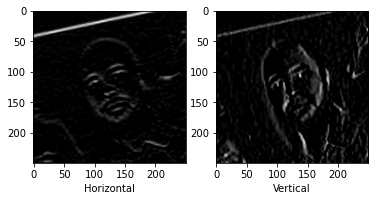

In [816]:
DGKernel = computeDerivativeOfGaussianGradient(5, 5, 3)

print("Horizontal Derivatives:" , GKernel[0])
G_Img_H= cv2.filter2D(grayScaleImg, -1, GKernel[0])
plt.subplot(121)
plt.imshow(G_Img_H,cmap='gray')
plt.xlabel('Horizontal')

print("Vertical Derivatives:" , GKernel[1])
G_Img_V= cv2.filter2D(grayScaleImg, -1, GKernel[1])
plt.subplot(122)
plt.imshow(G_Img_V,cmap='gray')
plt.xlabel('Vertical')
plt.show()

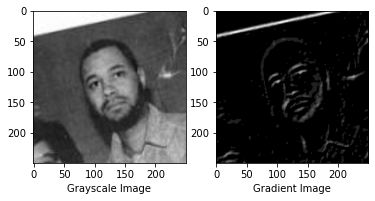

In [92]:
DGKernels=DGKernel[1]+DGKernel[0]
G_Img= cv2.filter2D(grayScaleImg, -1, DGKernels)
plt.subplot(121)
plt.imshow(grayScaleImg,cmap='gray')
plt.xlabel('Grayscale Image')
plt.subplot(122)
plt.imshow(G_Img,cmap='gray')
plt.xlabel('Gradient Image')
plt.show()

# PCA 2

In [802]:
#load_dataset
imgs = []
def read_directory(directory):
    for filename in os.listdir(r"./"+directory):
        for imgname in os.listdir(r"./"+directory+"/"+filename):
            image = cv2.imread(directory + "/" + filename+"/"+imgname)
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            for i in range(0,2):
                row,col,_= image.shape
                image = cv2.pyrDown(image, dstsize=(row//2,col//2))
            image=convertToGrayscale(image)
            image=image.flatten()
            imgs.append(image)
            
read_directory("lfw")
imgs=np.array(imgs)
imgs = imgs.astype('float32')
imgs = imgs / 255
imgs = imgs.T
print(imgs.shape)

(3844, 1054)


# PCA 3

In [691]:
def computePCA(imgMatrix):
    ImgMean=np.mean(imgMatrix,axis=1)
    ImgMean=np.expand_dims(ImgMean, axis=1)
    #compute mean 
    newImg=imgMatrix-ImgMean
    #compute cov
    cov=np.cov(newImg,rowvar=1)
    eigenvec,eigenval,VT = np.linalg.svd(cov)
    return ImgMean,eigenval,eigenvec

In [817]:
imgMean,eival,eivec=computePCA(imgs)
print(imgMean.shape,eival.shape,eivec.shape)

(3844, 1) (3844,) (3844, 3844)


In [729]:
#sort eival small to big
sorted_eival = np.argsort(eival)
k=3844
sorted_eivec = eivec[:,sorted_eival[:-k-1:-1]]

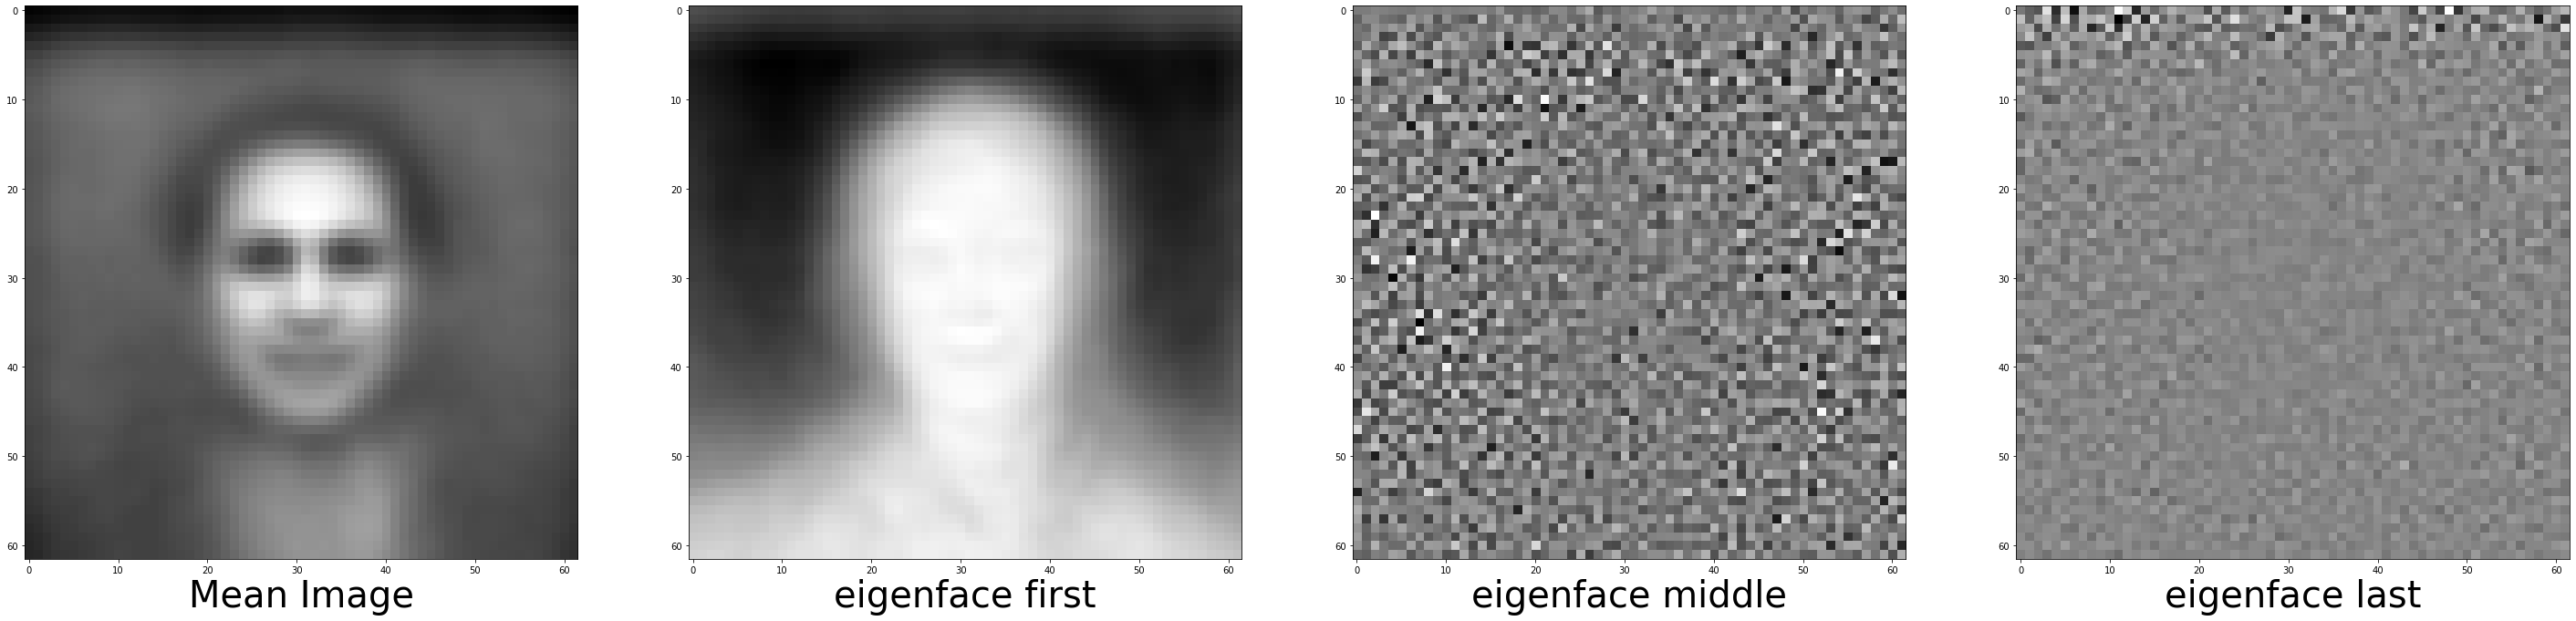

In [739]:
#plot mean image
plt.figure(figsize=(50,50))
plt.subplot(141)
imgMean=np.reshape(imgMean,(62,62))
plt.imshow(imgMean,cmap='gray')
label=plt.xlabel('Mean Image')
label.set_fontsize(40)

#plot eigenfaces1
plt.subplot(142)
eigenface1=np.reshape(sorted_eivec[:,0],(62,62))
eigenface1 = np.array(eigenface1,dtype=float)
plt.imshow(eigenface1,cmap="gray")
label=plt.xlabel('eigenface first')
label.set_fontsize(40)

#plot eigenfaces2
plt.subplot(143)
eigenface1=np.reshape(sorted_eivec[:,1921],(62,62))
eigenface1 = np.array(eigenface1,dtype=float)
plt.imshow(eigenface1,cmap="gray")
label=plt.xlabel('eigenface middle')
label.set_fontsize(40)

#plot eigenfaces3
plt.subplot(144)
eigenface1=np.reshape(sorted_eivec[:,3843],(62,62))
eigenface1 = np.array(eigenface1,dtype=float)
plt.imshow(eigenface1,cmap="gray")
label=plt.xlabel('eigenface last')
label.set_fontsize(40)
plt.show()

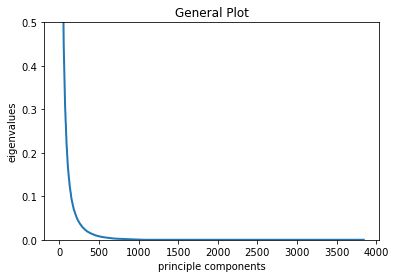

[6.66287411e+01 2.43891993e+01 1.39987418e+01 ... 3.25678401e-15
 2.90735637e-15 1.22147236e-15]


In [818]:
#plot Eigenvalue
plt.title("General Plot")
plt.ylim((0, 0.5))
plt.plot(eival, linewidth=2)
plt.xlabel('principle components', fontsize=10)
plt.ylabel('eigenvalues', fontsize=10)
plt.show()
print(eival)

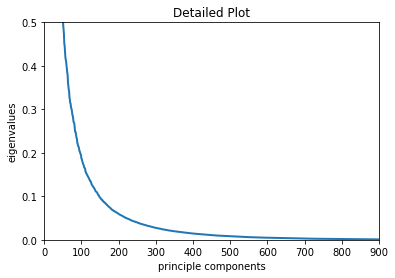

Eigenvalues: [6.66287411e+01 2.43891993e+01 1.39987418e+01 ... 3.25678401e-15
 2.90735637e-15 1.22147236e-15]


In [820]:
plt.xlim((0, 900))
plt.ylim((0, 0.5))
plt.title("Detailed Plot")
plt.plot(eival, linewidth=2)
plt.xlabel('principle components', fontsize=10)
plt.ylabel('eigenvalues', fontsize=10)
plt.show()
print("Eigenvalues:",eival)

# PCA 4

In [781]:
def reconstructFromPCA(image,k):
    #flatten image to a vector
    image = image.flatten()
    image = np.expand_dims(image, axis=1)
    sorted_eivec = eivec[:,sorted_eival[:-k-1:-1]]
    #project the image
    proj_face=np.dot(sorted_eivec.T,image)
    #approximate the image
    aprox_face = np.dot(sorted_eivec,proj_face)
    aprox_face = np.reshape(aprox_face,(62,62))
    return aprox_face

In [794]:
#select a image
path = './lfw/Al_Gore/Al_Gore_0006.jpg'
image = cv2.imread(path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
for i in range(0,2):
    row,col,_= image.shape
    image = cv2.pyrDown(image, dstsize=(row//2,col//2))
image = convertToGrayscale(image)

In [795]:
#Find index M that makes eival[M]>=0.01
M=0
for i in sorted_eival:
    if eival[i] >= 0.01:
        M=i
        break
print("M:",M,"eigenvalue:",eival[M])

M: 461 eigenvalue: 0.010036078445752652


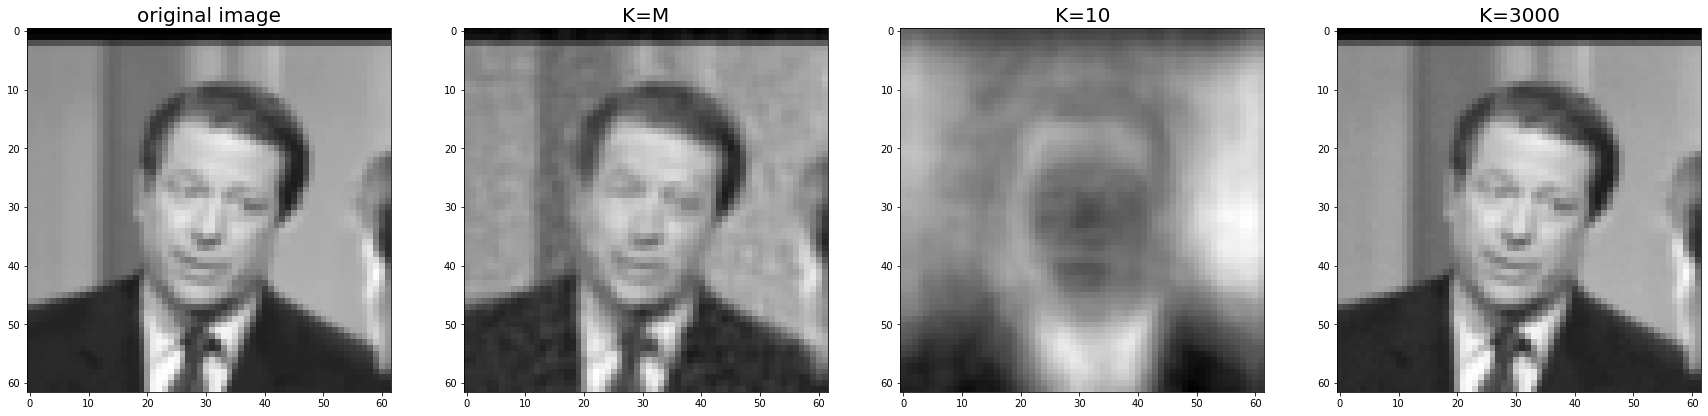

In [796]:
#original image
plt.figure(figsize=(30,30))
plt.subplot(141)
title=plt.title("original image")
plt.imshow(image,cmap='gray')
title.set_fontsize(20)

# show the approximate image
#K=M=461
approxface1=reconstructFromPCA(image,M)

plt.subplot(142)
title=plt.title("K=M")
title.set_fontsize(20)
plt.imshow(approxface1,cmap='gray')

#k=10
plt.subplot(143)
approxface2=reconstructFromPCA(image,10)
title=plt.title("K=10")
title.set_fontsize(20)
plt.imshow(approxface2,cmap='gray')

#k=3000
plt.subplot(144)
approxface3=reconstructFromPCA(image,3000)
title=plt.title("K=3000")
title.set_fontsize(20)
plt.imshow(approxface3,cmap='gray')
plt.show()